In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
from collections import Counter
import re
import pdf_parse_functions
from transformers import pipeline

In [2]:
from operator import itemgetter
import fitz
import spacy
from collections import Counter
import re


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
summa = pipeline("summarization")
sentiment_analysis = pipeline('sentiment-analysis')

In [7]:
datapath = "/home/helix/Documents/UNAIDS/code/unaids_branch/Demo/pdfs/" 
pdfnames = os.listdir(datapath)

In [84]:
pdfnames

['ToR_GAM_AI Data POC_Silo AI Oy.pdf',
 'colombia.pdf',
 'kenya2.pdf',
 'Zambia_IBBS_Final Report_May 2018.pdf',
 'SAIDS3.pdf',
 'SummaryBrazil.pdf',
 'SouthAfrica.pdf',
 'SAIDS.pdf',
 'Caribbean.pdf',
 'ARG.pdf',
 'SAIDS.txt',
 'centralAsia.pdf',
 'Cameroon Report_July 4 2014.pdf',
 'SAIDS1.pdf',
 'LimePaper.pdf',
 'Cameroon2014.pdf',
 'LimeVsShap.pdf',
 'LimeMedium.pdf',
 'Libro TRANS 2016.pdf']

# Central Asia:

In [135]:
language = "english"

if language == "spanish":
    keywords = ('sida', 'sexo', 'ETS')
    listOfStrings = ['TABLAS' , 'FIGURAS', 'figura', 'tabla', '...']
else:
    keywords = ('STI', "HIV") #('HIV', 'gender', 'STI')
    listOfStrings = ['TABLES' , 'FIGURE', 'figure', 'table', '...']

In [136]:
print(datapath+pdfnames[12])

/home/helix/Documents/UNAIDS/code/unaids_branch/Demo/pdfs/Cameroon Report_July 4 2014.pdf


In [138]:
paragraphs = pdf_parse_functions.pdf_parser(datapath+pdfnames[12])
paragraphs_with_key_words = pdf_parse_functions.get_paragraphs_with_key_words(paragraphs, keywords)

In [103]:
#paragraphs_with_key_words

In [142]:
# Clean the paragraphs:
word_list = []
for para in paragraphs_with_key_words:
    if any(w in para['text'] for w in listOfStrings)  == True:
        pass
    else:
        word_list.append(para)

In [143]:
paragraphs_with_key_words = word_list

In [126]:
df = pd.DataFrame.from_dict(paragraphs_with_key_words)

In [15]:
#df.to_csv('/home/helix/Documents/UNAIDS/Development/DemoFlask2/SA.csv', index=False)

In [16]:
#df[df['heading'] == '2) Gender'].text

In [161]:
paragraphs_with_key_words[1]['text']

'Nineteen services mentioned by MSM were visited in Yaounde including ten public facilities, four private clinics and five CBO/NGOs. 13/19 services reported specialized training for staff in dealing with MSM or FSW. Seventeen had undertaken HIV counseling and testing in the past month and four had undertaken specialized sessions (for MSM or FSW), twelve had provided ARV medication in last month and only one did not report ARV shortages in the last 12 months. It is noteworthy that of the four services mentioned by at least 10% of the population, three are associations with limited HCT facilities and no clinical provision. Only one of the top four (Hopital Central) reported having ARV capacity in the past four weeks, while also experiencing at least one ARV stock outage in the last 12 months. Additionally, the most frequently cited center by MSM was Humanity First with 40.1% of respondents identifying it while the next highest center was only identified by 19.7% of the population. In 201

In [162]:
summa(paragraphs_with_key_words[1]['text'])

[{'summary_text': ' Of all the cities, Yaounde had the second highest number of each population that reported not seeking or receiving HIV prevention, care, and treatment . Of the four services mentioned by at least 10% of the population, three are associations with limited HCT facilities and no clinical provision . Only one of the top four (Hopital Central) reported having ARV capacity in the past four weeks .'}]

In [186]:
datapath ='./upload_folder/'
pdfnames = os.listdir(datapath)
print(datapath+pdfnames[0])
paragraphs = pdf_parse_functions.pdf_parser(datapath+pdfnames[0])
paragraphs_with_key_words = pdf_parse_functions.get_paragraphs_with_key_words(paragraphs, ("HIV", "STI", "sex"))
    
lista = []
summaries = []
for i in range(0,len(paragraphs_with_key_words)):
    lista.append(paragraphs_with_key_words[i]['heading'])
    summaries.append(summa(paragraphs_with_key_words[i]['heading'])) #remove this for demo
    print(paragraphs_with_key_words[i]['text'])
    print("BREAK")
    #break # only to speed up
print("finish!")


./upload_folder/Cameroon2014.pdf


Your min_length is set to 56, but you input_length is only 6. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 6. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 5. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 5. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Figure 1. FSW HIV prevalence by Region in Cameroon (Tamoufe and Medang 2009). .......................................... 5Figure 2. Modified social ecological model (MSEM) for HIV risk in vulnerable populations (Baral, et al 2013). .... 7Figure 3. Continuum of care (after Gardner, 2011). ............................................................................................... 8Figure 4. HIV-related clinical services mentioned by MSM and visited by study staff in the Bafoussam area and MSM meeting places. ............................................................................................................................................ 21Figure 5. HIV-related clinical services and CBOs mentioned by MSM and visited by study staff in the Bamenda area and MSM meeting places.............................................................................................................................. 22Figure 6. HIV-related services mentioned by MSM and visited by study staff in

Your min_length is set to 56, but you input_length is only 7. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 7. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


The results of this study indicate that the behavioral and structural risks associated with higher exposure to HIV and other STIs that exist among key populations in other contexts also exist for MSM and FSW in Cameroon. Among the MSM population, while 90.8% (1454/1601) of the population sampled were not officially married, 57.1% (878/1536) reported at least one or more regular female partner. 33.1% (363/1097) of MSM participants used male condoms during every sexual act with a women in the last month, and very few reported the use of female condoms during every sexual act in the last month (1.36%; 15/1106). Among male sexual partners, 53.3% (757/1420) of the population reported they used male condoms during every anal sex act in the past month. These results are similar to earlier results (Care 2012) among MSM in Douala and Yaounde and indicates further behavioral prevention messaging is necessary to address concurrent sexual partners and condom use during all sex acts among this popu

Your min_length is set to 56, but you input_length is only 6. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 6. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Table i. Pooled prevalence data for FSW, clients of FSW, MSM and PWID per country from peer-reviewed literature since 1981 (Papworth et al in prep). ....................................................................................................... 1Table ii. FSW HIV prevalence estimates by city showing sample size and authors. ................................................ 5Table iii. Characteristics of key sites in Cameroon used to select study sites. ........................................................ 9Table iv. Estimated sex worker population ranges in target cities based on Tamoufe and Medang, 2009. ........... 9Table v.Quantitative data collected across the 7 cities ........................................................................................ 13Table vi. Qualitative data collected across the 7 cities ......................................................................................... 13Table vii. Numbers of unique objects distributed in each population 

Your min_length is set to 56, but you input_length is only 7. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 7. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Nineteen services mentioned by MSM were visited in Yaounde including ten public facilities, four private clinics and five CBO/NGOs. 13/19 services reported specialized training for staff in dealing with MSM or FSW. Seventeen had undertaken HIV counseling and testing in the past month and four had undertaken specialized sessions (for MSM or FSW), twelve had provided ARV medication in last month and only one did not report ARV shortages in the last 12 months. It is noteworthy that of the four services mentioned by at least 10% of the population, three are associations with limited HCT facilities and no clinical provision. Only one of the top four (Hopital Central) reported having ARV capacity in the past four weeks, while also experiencing at least one ARV stock outage in the last 12 months. Additionally, the most frequently cited center by MSM was Humanity First with 40.1% of respondents identifying it while the next highest center was only identified by 19.7% of the population. In 2011

Your min_length is set to 56, but you input_length is only 12. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 12. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


This study was conducted in the framework of the 2011-2015 Cameroon National Strategic Plan for the Fight Against HIV/AIDS that highlighted a need to elucidate the health requirements status of key populations in Cameroon. Additionally, Cameroon is currently reviewing this plan and modifying to cover 2014-2017. Key population baseline data will be critical for the proper planning of interventions aiming to significantly decrease the burden of the HIV epidemic in these high risk populations, and indirectly reduce the incidence of new HIV infections in the general population. Despite low HIV prevalence among the general population relative to other regions of sub-Saharan Africa, West and Central Africa contribute a significant proportion of new HIV infections to the global burden due to their large populations (combined regional population ~356 million, World Bank, 2012). While national HIV prevalence ranges from <1%-5% in the region, prevalence among key populations (KP) such as female 

Your min_length is set to 56, but you input_length is only 4. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Under the Cameroon National Strategic Plan for HIV (2011 – 2015), the Government of Cameroon facilitates the availability of HIV testing and counseling at both community and health center based services. Community based organizations (CBO) may provide HIV Testing and Counseling and refer patients on to accredited health services that provide further clinical assessments, usually at a hospital or health center. These services are mainly public, with some private and religious health services accredited to provide comprehensive HIV testing and care. Currently, CBO level prevention activity is restricted to HCT with trained counselors, and the distribution and education regarding condoms and condom compatible lubricant through trained CBO staff and peer educators. Nationally, there are currently two Key Population specific programs that function in five main cities in the country (Bamenda, Bertoua, Kribi, Yaounde, Douala). The USAID HIV AIDS Prevention Program (HAPP), supports CBOs to pro

Your min_length is set to 56, but you input_length is only 13. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 13. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


ACMS: Association Camerounaise pour le Marketing Social ACODEDUGN: Association des Couches défavorisées et Vulnérables du Grand-Nord. ACODEVO: Association des Couches défavorisées et Vulnérables de l'Océan. ADEFHO: Association pour la Défense des Homosexuels AIDS ACODEV: Aide Auprès des Couches Défavorisées et Vulnérables. AIDS: Acquired Immunodeficiency Syndrome ART: Anti-Retroviral Therapy ARV: Antiretroviral ASAD: Association d'Assistance au Développement. CAMFAIDS: Cameroonian Foundation For AIDS. CAMNAFAW: Cameroon National Association for Family Wealfare CBO: Community-based Organization. CCP: Center for Communication Programs CD4: Cluster of differentiation 4 CDC: Centers for Disease Control CI: Confidence Interval CNERSH: Comité National d'Ethique de la Recherche pour la Santé Humaine. CNLS: Comité National de Lutte contre le SIDA COFENHO: Collectif des Familles des Enfants Homosexuels. CPHHR: Center for Public Health and Human Rights. CSI: Centre de Santé Intégrée. DROS: Divis

Your min_length is set to 56, but you input_length is only 11. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 11. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


HIV Prevention for Populations at Risk in Cameroon - Appendix 6. Copies of administrative authorizations. Final report (4 July 2014). 93 HIV Prevention for Populations at Risk in Cameroon - Appendix 6. Copies of administrative authorizations. Final report (4 July 2014).94 HIV Prevention for Populations at Risk in Cameroon - Appendix 6. Copies of administrative authorizations. Final report (4 July 2014). 95 HIV Prevention for Populations at Risk in Cameroon - Appendix 6. Copies of administrative authorizations. Final report (4 July 2014).96 HIV Prevention for Populations at Risk in Cameroon - Appendix 6. Copies of administrative authorizations. Final report (4 July 2014). 97 HIV Prevention for Populations at Risk in Cameroon - Appendix 6. Copies of administrative authorizations. Final report (4 July 2014).98 HIV Prevention for Populations at Risk in Cameroon - Appendix 6. Copies of administrative authorizations. Final report (4 July 2014). 99 HIV Prevention for Populations at Risk in Ca

Your min_length is set to 56, but you input_length is only 5. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 5. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Male condom use during vaginal sex with clients in last month Everytime 69.0 58.5 70.6 17.5 9.40 10.9 46.7 40.8 (737/1805) Almost everytime 23.7 31.9 14.5 45.5 58.6 71.9 45.0 41.6 (750/1805) Some of the time 7.3 9.3 14.9 35.5 28.9 16.8 5.9 16.7 (301/1805) Almost none of the time 0.0 0.0 0.0 0.5 1.5 0.3 0.0 0.3 (6/1805) None of the time 0.0 0.3 0.0 0.9 1.5 0.0 2.4 0.6 (11/1805) Female condom use during vaginal sex with clients in last month Everytime 0.0 0.0 0.0 0.0 0.0 0.0 1.2 0.1 (2/1802) Almost everytime 1.3 1.7 2.4 9.5 8.3 3.5 1.2 3.5(63/1802) Some of the time 19.7 23.0 20.1 31.8 53.0 35.2 39.3 35.2 (635/1802) Almost none of the time 4.0 4.7 4.7 4.7 1.9 3.3 3.6 3.3 (60/1802) None of the time 75.0 70.7 72.8 54.0 36.8 57.8 54.8 57.8 (1042/1802) Male condom use during vaginal sex with non-paying partners in last month Everytime 15.1 13.0 30.8 3.0 5.7 5.1 29.4 13.1 (180/1379) Almost everytime 3.5 14.1 5.5 38.6 16.2 11.8 11.9 14.6 (202/1379) Some of the time 17.6 14.6 14.8 31.5 34.6 60.4

Your min_length is set to 56, but you input_length is only 18. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 18. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


The prevalence of rape among FSW was high with 45.9% indicating they had been forced to have sex on at least one occasion. This varied from 31.4% in Bafoussam to 60.0% in Kribi (see Appendix 3, Table 2). The Cameroon Ministry of Justice reported 68 adult victims of rape in 2010 (Ministry of Justice 2011) and 89 in 2011 (Ministry of Justice 2012). Self-reported denial of health care services because of occupation as a sex worker was 3.2% and varied from 1.0% in Yaounde to 11.8% in Kribi. Bad treatment because of occupation was reported by 5.4% of participants, varying from 1.6% in Yaounde and Bafoussam to 17.2% in Kribi. Self-reported levels of denial of police protection because of sex work among FSW was 33.4% across all sites and varied from 9.0% in Bamenda to 66.4% in Bertoua. Arrest because of sex works were reported at 55.6% across sites, varying from 42.6% in Kribi to 67.9% in Douala. Having spent time in jail or prison because of sexual HIV Prevention for Populations at Risk in C

Your min_length is set to 56, but you input_length is only 6. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 6. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Eight services mentioned by MSM were visited in Bamenda including three public and five private facilities. Information from one of the services was not possible to obtain, as the service itself refused to respond or consent to participate in this study. One of the services was a PEPFAR HAPP funded Drop-In Center which reported specialized training for staff in dealing with MSM or FSW, however this service had limited capacity to care and treat for HIV positive patients and instead mainly referred patients to other services. All of the HIV Prevention for Populations at Risk in Cameroon - final report (4 July 2014).42 services had undertaken HIV counseling and testing in the past month and the Drop-in Center cited above had undertaken specialized sessions (for FSW or MSM). Six of the eight services had provided ARV medication in last month and three of these reported ARV shortages in the last 12 months. Of the top listed services/centers, one declined to participate in the study, and th

Your min_length is set to 56, but you input_length is only 5. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 5. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Review of the HIV epidemic in West and Central Africa suggests that the epidemic is relatively concentrated and more closely resembles the epidemics in Southeast Asia and Latin America than the rest of SSA. This highlights the importance of providing adapted and inclusive HIV prevention, care and treatment services to key populations, such as FSW and MSM, more highly affected by the epidemic in the region. The epidemiology of HIV in Cameroon shows the country is not different from other central and west African countries and targeted, cost-effective programs that address not only behavioral, but biological and structural risk factors associated with HIV acquisition and transmission in key populations should be implemented to reduce the onward spread of HIV. Prevention programs should model strategies on the continuum of care and appropriate programs that increase uptake of treatment among key populations, address the barriers to health care that exist in highly stigmatized settings, an

Your min_length is set to 56, but you input_length is only 6. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 6. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


In this section we have attempted to detail which services were the most used by FSW in each of the study cities. We present characteristics of the services the most reported as a guide to where to invest in improvements to service provision for this population. Frequently we see that the service the most reported in each city is not a service that has invested in staff training or specialized services for these populations. These services are well placed to provide services that can assist in decreasing HIV transmission in this high prevalence group. 32.7% of FSW participants had disclosed their occupation to a doctor or nurse, this varied from 17.3% in Ngaoundere to 49.4% in Bertoua. 9.6% (174/1815) of FSW participants were not able to list a single HIV prevention, testing or treatment service. 68.0% of FSWs indicated they had received HIV prevention information in the last 12 months, of these 66.3% had received information from trained peer educators, 49.5% from media, and 48.0 % fr

Your min_length is set to 56, but you input_length is only 6. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 6. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Seven services mentioned by MSM were visited in Kribi including three public facilities, two private and one CBO however it was not possible to obtain information from one of the services, Hopital d'Ebome. Four of the six services reported specialized training for staff in dealing with MSM or FSW. Five had undertaken HIV counseling and testing in the past month and one had undertaken specialized sessions (for MSM or FSW), two had provided ARV medication in last month and neither of these reported ARV shortages in the last 12 months. HIV Prevention for Populations at Risk in Cameroon - final report (4 July 2014).44 Two services were cited by more than 10% of the MSM population in Kribi, one provided clinical services, including ARV medications, and the other was the PEPFAR funded Drop-in center with no clinical capacity. The one clinical service in Kribi reported no ARV medication stock outages in the past 12 months. Nine services mentioned by FSW were visited in Kribi including three p

Your min_length is set to 56, but you input_length is only 5. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 5. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Six services mentioned by MSM were visited in Bertoua including four public facilities, and 2 private. Two of the services reported specialized training for staff in dealing with MSM or FSW. All of the services had undertaken HIV counseling and testing in the past month and one, which was an association, had undertaken specialized sessions (for MSM or FSW), three of the six services had provided ARV medication in last month and all of these reported ARV shortages in the last 12 months. HIV Prevention for Populations at Risk in Cameroon - final report (4 July 2013).43 Of the top three services listed, none had specialized training on the health needs of MSM or FSW, two of the three provided ARV medication and both reported ARV stock outages in the past 12 months. Eight services mentioned by FSW were visited in Bertoua including four public facilities, three private and one CBO. Four of the services reported specialized training for staff in dealing with MSM or FSW. All of the services h

Your min_length is set to 56, but you input_length is only 5. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 5. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Twenty services mentioned by MSM were visited in Douala including ten public facilities, seven private and three CBOs. Eight of the twenty services reported specialized training for staff in dealing with MSM or FSW. All except one had undertaken HIV counseling and testing in the past month and three had undertaken specialized sessions (for MSM or FSW), fourteen had provided ARV medication in last month and all but only two reported ARV shortages in the last 12 months. Of the top three services listed, the only one that reported providing ARV medication in the past 4 weeks, also reported shortages in the past 12 months. Nineteen services mentioned by FSW were visited in Douala including ten public facilities, five private and four CBOs. Nine of the nineteen services reported specialized training for staff in dealing with MSM or FSW. All except one had undertaken HIV counseling and testing in the past month and six had undertaken specialized sessions (for MSM or FSW), fourteen had provid

Your min_length is set to 56, but you input_length is only 6. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 6. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


iii 
BREAK


Your min_length is set to 56, but you input_length is only 4. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Numerous studies and data sources covering key populations were obtained from government partners, NGOs and associations. One study provided estimates of SW populations in cities in Cameroon based on mapping and key informants. For MSM two studies presented HIV serology among MSM in Cameroon (Tamoufe and Medang 2009, CARE 2012). A number of other studies (for which data sets were not obtained) collected statistics on clinic or outreach-based HIV testing by NGO and associations. Among female sex workers a series of studies and data were available (see Table 2) showing a growing understanding of prevalence from localized studies to two national seroprevalence studies (Mosoko et al, 2004; Tamoufe and Medang, 2009). Behavioral data also exists, in combination with serological data (SW: Tamoufe and Medang, 2009, CARE 2012) and stand alone behavioral data (eg for FSW a study by WOPA and JHU in Kribi and ACMS and CAMNAFAW studies and among MSM studies and data sets collected by ACMS and CAMNA

Your min_length is set to 56, but you input_length is only 7. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 7. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


In this section we have attempted to detail which services were the most used by MSM in each of the study cities. We present characteristics of the services the most reported as a guide to where to invest in improvements to service provision for this population. Outside of Yaounde and Douala we see that the services which are most reported are not services that have invested in staff training or specialized services for these populations. These services are well placed to provide services that can assist in decreasing HIV transmission in this high prevalence group. 25.8% of MSM participants had revealed their sexual orientation to a doctor or nurse, this varied from 11.3% in Bertoua to 37.1% in Douala. The sites with no specialized clinical services for MSM were the sites with the lowest levels of disclosure to medical personnel (Bafoussam 23.1%, Bamenda 25.7%, Bertoua 11.3% and Ngaoundere 23.0%). 7.5% (121/1606) of MSM participants were not able to list a single HIV prevention, testin

Your min_length is set to 56, but you input_length is only 8. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 8. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Eight services mentioned by MSM were visited in Bafoussam including five public facilities, 2 private and 1 CBO. Three of the services reported specialized training for staff in dealing with MSM or FSW, however two were associations, not clinical service providers. All of the services/centers had undertaken HIV counseling and testing in the past month and one association had undertaken specialized sessions for MSM. Two of the seven services had provided ARV medication in last month. Of the three top services listed by the MSM population, one was an association with only HCT capacity, and the other two services were public hospitals. One of these two public hospitals was visited and reported providing ARV medication, no staff training for MSM/FSW service provision, and ARV shortages in the last twelve months. Ten services mentioned by FSW were visited in Bafoussam including five public facilities, and five private clinics. Two of the services reported specialized training for staff in h

Your min_length is set to 56, but you input_length is only 4. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Eight services mentioned by MSM were visited in Ngaoundere including four public facilities, and four private clinics. Two of the six services reported specialized training for staff in dealing with MSM or FSW. All had undertaken HIV counseling and testing in the past month and one had undertaken specialized sessions (for MSM or FSW), five had provided ARV medication in last month and two reported ARV shortages in the last 12 months. Of the two top services listed, both reported providing ARV medication and one reported an ARV stock shortage in the past 12 months. Ngaoundere was one of the few cities visited with no specific community-based organization specializing in MSM or FSW interventions. Through this study, a satellite office of another MSM –specific CBO was created and registered in the city. Six services mentioned by FSW were visited in Ngaoundere including three public facilities and three private clinics. One of the six services reported specialized training for staff in dea

Your min_length is set to 56, but you input_length is only 7. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 7. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


The diversity of results across cities for MSM highlights the needs for tailored services per city that account for the social and cultural dynamics across Cameroon. In cities where tailored service existed, higher levels of HIV status knowledge, discloser to health providers, and condom use among both male and female partners was reported. Health providers were cited as a source for HIV prevention information, as were peer-educators, mainly supported through PEPFAR HAPP program. Combining programs that integrate community-level interventions (CBOs, peer educators, counseling) with support and linkage to HIV care and treatment services (integrated into public or private health services, or stand-alone), will greatly alter the uptake of care and treatment services among MSM. 
BREAK


Your min_length is set to 56, but you input_length is only 10. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 10. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


A technical review was undertaken by the Cameroon National AIDS Control Committee Monitoring and Evaluation group during one of their regular meetings and comments and suggestions integrated and a letter supporting the study was obtained and copied to each region where the study was to be undertaken (0218/2013/L/MINSANTE/CAB/STBP/CNLS/GTC/SP/SPSE/mla du 8 fev 2013 – see Appendix 5). The study protocol, data collection tools and consent forms were reviewed and approved by the Comité National d'Ethique de la Recherché pour la Santé Humaine (2013/03/065/L/CNERSH/SP du 21 mars 2013) and the Johns Hopkins University Institutional Review Board (IRB no 00004257, 2 Jan 2013 and amended 18 April 2013). The Directorate of Operational Research at the Ministry of Public Health reviewed the protocol, provided comments which were integrated and provided administrative approval (Authorisation Administrative de Recherche No 631-05.13, correspondence No D30-405AAR/MINSANTE/SG/DROS/CRC/CEA1 du 23 mai 20

Your min_length is set to 56, but you input_length is only 4. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


33.1% of participants who had engaged in vaginal sex in the last month and 53.3% of those who had engaged in anal sex in the last month had consistently used male condoms. 65.6% of participants indicated they received condoms for free (40% reported receiving from peer educators, and 19.6% from drop in centers) and 69.9% reported purchasing condoms (58.3% from shops and 31.7% from pharmacies and only 5.5% from street sellers). Use of lubricant was reported by 83% of participants, though this varied from 69.4% in Ngaoundere, where no MSM CBO was operating up to 2013, to 94.8% in Douala where a number of well-established MSM CBOs operate. Of those who had used lubricants, 79.2% (1048/1324) indicated using some kind of commercial sexual lubricant (as opposed to using an alternative product not specifically designed to be used as a sexual lubricant such as body lotions, oils etc). This varied from 60.9% in Kribi to 95.5% in Bamenda. 38.2% of participants felt that lubricants were easy to fi

Your min_length is set to 56, but you input_length is only 9. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


ii 
BREAK


Your min_length is set to 56, but you input_length is only 9. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


We would like to thank the Cameroon Government and the National Institute of Statistics. Technical working group for this project consisted of: Dr. Serge Billong (CNLS), Raoul Fodjo (CNLS), Arlette Messeh (GTC-CNLS), Dr. Armand Nwetchsu (DROS), Viviane Fossouo (ONSP), Valentine Mondoleba/Nguemne Duplextine (CAMNAFAW), Laure Moukam (ACMS), Dr Steave Nemande/Alain Loyem (Evolve), Ondoa Ambo Hortence (Horizons Femmes), Isaac Macauley/Jean Christophel (CARE Cameroon), Dr. Flavien Ndonko (GIZ), Dr. Ekanmian Gatien (UNAIDS), Thomas Ologo Issekou (Affirmative Action), Eitel J. Ella Ella (CAMFAIDS), Franz Mananga/Joseline Mandeng (Alternatives), Jules Eloundou (Humanity First), Adonis Tchoudja (AIDS ACODEV), Souaibou Moussa/Alice Tchakote (INS), Ubald Tamoufe (GV), Matthew LeBreton (GV/Metabiota), Erin Papworth (JHU), Claire Holland (JHU), Aristide Kamla (GV). Key Field Investigative Team: Erin Papworth (JHU), Ubald Tamoufe (GV), Aristide Kamla (GV), Claire Holland (JHU). JHU R2P: Deanna Kerri

Your min_length is set to 56, but you input_length is only 9. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


This study does not permit national extrapolations outside of major cities, no rural sites were included in the study limiting our ability to understand key populations and access to services in those areas. However, as many of the individuals in those areas will likely be moving to larger cities to seek testing and treatment care the coverage in this report is probably representative of the services they are accessing. Additionally, as the majority of the target populations probably occur in urban centers a large proportion of the population was captured and assessed in this study. Multiple techniques were used for population estimation as each method has limitations and assumptions. For example, estimations by the unique object method are reduced by the closed nature of the communities and the limited methods of access. The objects distributed by CBOs were recuperated in part by working with the same CBOs in areas where they operate. This certainly reduces the population size estimat

Your min_length is set to 56, but you input_length is only 9. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


HIV Prevention for Populations at Risk in Cameroon - final report (4 July 2013).23 
BREAK


Your min_length is set to 56, but you input_length is only 9. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


HIV Prevention for Populations at Risk in Cameroon - final report (4 July 2013).25 
BREAK


Your min_length is set to 56, but you input_length is only 4. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


HIV Prevention for Populations at Risk in Cameroon - final report (4 July 2013).27 
BREAK
The prevalence of rape among MSM was important with 27.3% indicating they had been forced to have sex on at least one occasion. This varied from 16.7% in Bertoua to 41.1% in Kribi (see Appendix 2, Table 2). Self-reported denial of health care services because of sexual orientation was 5.7% and 1.6% in Bertoua to 10.5% in Kribi. Bad treatment because of sexual orientation was reported by 8.3% of participants, varying from 2.0% in Bamenda to 17.5% in Bafoussam. Having been blackmailed was commonly reported by participants with 39.8% reporting across all sites and 68.0% reporting this in Bamenda. Bertoua had the lowest rate with 18.8% of individuals reporting having been blackmailed. Having been beaten or physically hurt was reported by 14.5% of participants with 4.4% reporting in Bertoua up to 27.5% in Bamenda. Self-reported levels of denial of police protection because of sexual orientation was 8.1

In [ ]:
##DATABASE AND OUT IT THERE

In [208]:
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017/")
mydatabase = client["resumenesDB"]
mydatabase.list_collection_names()

['test', 'resumenes']

In [209]:
mycollection = mydatabase["test"]

In [210]:
country = "Cameroon"


In [214]:
import datetime
for summary in summaries:
    date = datetime.datetime.now()
    mycollection.insert_one({"country": country, "time": date,  "summary": summary[0]["summary_text"]})
    

In [181]:
for record in summaries:
    print(record)
    test.insert_one(record)

[{'summary_text': ' FSW HIV prevalence by Region in Cameroon (Tamoufe and Medang 2009) HIV prevalence is highest in the country . HIV-related clinical services mentioned by FSW and visited by study staff in the Bafoussam area and the Douala area . HIV related clinical services and CBOs mentioned by . FSW staff in Douala, Bamenda, Ngaoundere, Yaounde and Bamenda areas .'}]


In [188]:
for f, b in zip([1,2,4], ['a','b','c']):
    print(f, b)

1 a
2 b
4 c


In [206]:
summaries[0][0]["summary_text"]

" CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery . Please submit your best shots for next week's gallery of snapshots of the world's top athletes . Visit CNN iReport.com/Travel next Friday for a new look at the top 10 things you know about ."

In [154]:
type(paragraphs_with_key_words[3]['text'])

str

In [11]:
# Loop to automatize this process
lista = []
summaries = []
for i in range(0,len(paragraphs_with_key_words)):
     lista.append(paragraphs_with_key_words[i]['text'])
    
     summaries.append(summa(paragraphs_with_key_words[i]['text']))


Your max_length is set to 142, but you input_length is only 128. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 137. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 138. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 54. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 76. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 94. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 63. You might consi

Sentiment analyses


In [15]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["SummariesDB"]

In [16]:
mycol = mydb["summaries"]

In [29]:
#x = mycol.insert_many(summaries)
for i in summaries:
    x = mycol.insert_one(i[0])

In [219]:
stuff = mycollection.find()

In [221]:
summaries = []
for i in stuff:
    summaries.append(i)
    

In [243]:
while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")

Please enter a number:  ö


Oops!  That was no valid number.  Try again...


Please enter a number:  2


In [241]:
summaries[0]['summary']
try:
    sentiment_analysis(summaries[25]['summary'])
except

IndexError: index out of range in self

In [245]:
label = []
score = []

j =0
for i in summaries:
    try:
        result = sentiment_analysis((i['summary']))[0]
        #print(j)
        print(result)
        label.append(result['label'])
        score.append(result['score']) 
    except:
        pass
    j += 1

{'label': 'NEGATIVE', 'score': 0.9691808223724365}
{'label': 'POSITIVE', 'score': 0.9980064034461975}
{'label': 'POSITIVE', 'score': 0.945490300655365}
{'label': 'POSITIVE', 'score': 0.9936396479606628}
{'label': 'NEGATIVE', 'score': 0.9970672130584717}
{'label': 'POSITIVE', 'score': 0.9894372224807739}
{'label': 'NEGATIVE', 'score': 0.9980884790420532}
{'label': 'POSITIVE', 'score': 0.9444937109947205}
{'label': 'POSITIVE', 'score': 0.9577524065971375}
{'label': 'POSITIVE', 'score': 0.9722762107849121}
{'label': 'POSITIVE', 'score': 0.997793972492218}
{'label': 'POSITIVE', 'score': 0.9577524065971375}
{'label': 'POSITIVE', 'score': 0.9839016199111938}
{'label': 'POSITIVE', 'score': 0.9956543445587158}
{'label': 'NEGATIVE', 'score': 0.9710613489151001}
{'label': 'POSITIVE', 'score': 0.9577524065971375}
{'label': 'NEGATIVE', 'score': 0.9715346693992615}
{'label': 'POSITIVE', 'score': 0.9928081035614014}
{'label': 'POSITIVE', 'score': 0.9977829456329346}
{'label': 'POSITIVE', 'score': 0.

In [51]:
result

{'label': 'NEGATIVE', 'score': 0.9944685101509094}

In [246]:
def plot(summaries):
    label = []
    score = []
    for i in summaries:
        try:
            result = sentiment_analysis((i['summary']))[0]
            #print(j)
            #print(result)
            label.append(result['label'])
            score.append(result['score']) 
        except:
            pass  
    
    data_tuples = list(zip(label, score))
    df = pd.DataFrame(data_tuples, columns=['label','score'])

    posit = df[df["label"] == "POSITIVE"]
    negat = df[df["label"] == "NEGATIVE"]
    means = [posit['score'].mean(), negat['score'].mean() ]
    labe = ["POSITIVE", "NEGATIVE"]

    fig = plt.figure()


    ax = fig.add_axes([0,0,1,1])
    ax.set_ylim([0,1])
    ax.bar(labe, means)
    ax.set_xlabel("sentiment")
    ax.set_title("Article 2")
    ax.set_ylabel("Mean score Latin America")
    plt.show()

{'label': 'NEGATIVE', 'score': 0.9691808223724365}
{'label': 'POSITIVE', 'score': 0.9980064034461975}
{'label': 'POSITIVE', 'score': 0.945490300655365}
{'label': 'POSITIVE', 'score': 0.9936396479606628}
{'label': 'NEGATIVE', 'score': 0.9970672130584717}
{'label': 'POSITIVE', 'score': 0.9894372224807739}
{'label': 'NEGATIVE', 'score': 0.9980884790420532}
{'label': 'POSITIVE', 'score': 0.9444937109947205}
{'label': 'POSITIVE', 'score': 0.9577524065971375}
{'label': 'POSITIVE', 'score': 0.9722762107849121}
{'label': 'POSITIVE', 'score': 0.997793972492218}
{'label': 'POSITIVE', 'score': 0.9577524065971375}
{'label': 'POSITIVE', 'score': 0.9839016199111938}
{'label': 'POSITIVE', 'score': 0.9956543445587158}
{'label': 'NEGATIVE', 'score': 0.9710613489151001}
{'label': 'POSITIVE', 'score': 0.9577524065971375}
{'label': 'NEGATIVE', 'score': 0.9715346693992615}
{'label': 'POSITIVE', 'score': 0.9928081035614014}
{'label': 'POSITIVE', 'score': 0.9977829456329346}
{'label': 'POSITIVE', 'score': 0.

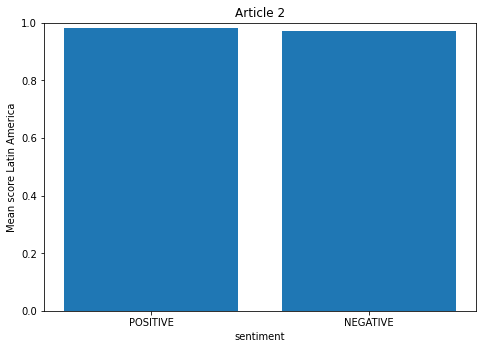

In [247]:
plot(summaries)

# MongoDB

In [22]:
country = "colombia"

In [44]:
# importing module
from pymongo import MongoClient
  
# creation of MongoClient
client=MongoClient()
  
# Connect with the portnumber and host
client = MongoClient("mongodb://localhost:27017/")
  
# Access database
mydatabase = client["UNAIDS_db"]
  
# Access collection of the database
mycollection = mydatabase["summaryTable"]
 

In [54]:
for para in paragraphs_with_key_words:
    mydatabase.summaryTable.insert_one(para)

In [55]:
cursor = mycollection.find()
for record in cursor:
    print(record)

{'_id': ObjectId('6093c92a2799b9616a6f8a11'), 'heading': '6. Conclusions ', 'text': 'The costing of HIV interventions in this study is based on 2016 HIV guidelines and considers two scenarios: NASCOP and Standard. The NASCOP scenario was based on national HIV programme targets towards achievement of 90-90-90, and the Standard scenario was based on the assumption that the guidelines would be fully implemented as spelt out in the 2016 ART guidelines. In the NASCOP scenario, the population base is assumed to be constant for the four-year costing projections, while the Standard scenario adjusts its population in need to consider incidence, mortality, and population growth rates. However, both scenarios considered two key assumptions: the gains obtained from the reduction in HIV mortality and the reduction in HIV incidence rates. Findings have shown that the average annual cost of putting a patient on ARVs is Ksh 12,032.36 (US$115.7). The Standard scenario costs more than the NASCOP scenari

In [57]:
# Find first document
x = mycollection.find_one()
print(x)

{'_id': ObjectId('6093c92a2799b9616a6f8a11'), 'heading': '6. Conclusions ', 'text': 'The costing of HIV interventions in this study is based on 2016 HIV guidelines and considers two scenarios: NASCOP and Standard. The NASCOP scenario was based on national HIV programme targets towards achievement of 90-90-90, and the Standard scenario was based on the assumption that the guidelines would be fully implemented as spelt out in the 2016 ART guidelines. In the NASCOP scenario, the population base is assumed to be constant for the four-year costing projections, while the Standard scenario adjusts its population in need to consider incidence, mortality, and population growth rates. However, both scenarios considered two key assumptions: the gains obtained from the reduction in HIV mortality and the reduction in HIV incidence rates. Findings have shown that the average annual cost of putting a patient on ARVs is Ksh 12,032.36 (US$115.7). The Standard scenario costs more than the NASCOP scenari

In [58]:
x.keys()

dict_keys(['_id', 'heading', 'text', 'key_words_info', 'importance', 'country'])

In [64]:
# Filtering the Quantities greater
# than 40 using query.
cursor = mycollection.find({"importance": {"$lt": 10}})

In [65]:
print("The data having Quantity greater than 40 is:")
for record in cursor: 
    print(record) 

The data having Quantity greater than 40 is:
{'_id': ObjectId('6093c92a2799b9616a6f8a12'), 'heading': 'Executive Summary ', 'text': 'In 2016, the Ministry of Health (MOH) updated Kenya’s national HIV guidelines to provide guidance on the use of antiretrovirals (ARVs) to treat and prevent HIV infection. To inform implementation and resource mobilisation, the MOH needed to understand the costing implications of implementing the new guidelines. This created the need for a study to estimate the costs of implementing the new guidelines, based on the country targets and covering all known people living with HIV in Kenya. This study adopted a micro-costing approach using population data from 2015 HIV revised estimates. The study considered two costing scenarios—the “NASCOP scenario,” based on NASCOP (National AIDS/STI Control Programme) targets to achieve the UNAIDS 90-90-90 targets; and the “Standard scenario,” based on full adoption of the new guidelines. The results show that the average a

In [ ]:
filter = { 'appliance': 'tv' }

In [272]:
cursorII = mycollection.find()

In [275]:
j = 0
for record in cursorII: 
    summary = record["summary"]
    j += 1
    if j = 5:
        break

In [276]:
summary

[{'summary_text': ' MSM    MSM \xa0MSMS is a news organization that focuses on African-American issues . It has been in the news for more than a decade . It is a network of African-Americans living in the U.S. for the first time in their history .'}]